In [1]:
import numpy as np
import pandas as pd
import os
from pathlib import Path

In [2]:
dataset =Path("d:\ML_NOTE_DATASET")
dataset

WindowsPath('d:/ML_NOTE_DATASET')

In [3]:
df_cleaned = pd.read_csv(f"{dataset}/startup_cleaned.csv")
df_cleaned.head()

,date,startup,vertical,subvertical,city,investors,round,amount
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
3,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


In [4]:
df = pd.read_csv(f"{dataset}/startup_funding.csv")
df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [6]:
df.drop(columns='Remarks', inplace=True)
df.set_index("Sr No", inplace=True)


In [7]:
df.columns

Index(['Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical', 'SubVertical',
       'City  Location', 'Investors Name', 'InvestmentnType', 'Amount in USD'],
      dtype='object')

In [8]:
df.rename(columns={
    'Date dd/mm/yyyy':'date',
    'Startup Name' : 'starup',
    'Industry Vertical': 'vertical',
    'SubVertical' :'subvertical',
    'City  Location':'city',
    'Investors Name' :'investors', 
    'InvestmentnType':'round',
    'Amount in USD' :'amount'
}, inplace=True)

df

,date,starup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"
...,...,...,...,...,...,...,...,...
3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000"
3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000"
3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         3044 non-null   object
 1   starup       3044 non-null   object
 2   vertical     2873 non-null   object
 3   subvertical  2108 non-null   object
 4   city         2864 non-null   object
 5   investors    3020 non-null   object
 6   round        3040 non-null   object
 7   amount       2084 non-null   object
dtypes: object(8)
memory usage: 214.0+ KB


### Cleaning Amount Column

In [10]:
df['amount'] = df['amount'].str.replace(',','')
df['amount'] = df['amount'].fillna('0')
df['amount'] = df['amount'].str.replace('undisclosed','0')
df['amount'] = df['amount'].str.replace('Undisclosed','0')
df['amount'] = df['amount'].str.replace('unknown','0')
df['amount'] = df['amount'].str.replace(r'\D', '', regex=True).astype('float')


### Cleaning Investor Column

In [11]:
df['investors'] = df['investors'].str.upper()

In [12]:
df.head()

,date,starup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,TIGER GLOBAL MANAGEMENT,Private Equity Round,200000000.0
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,SUSQUEHANNA GROWTH EQUITY,Series C,8048394.0
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,SEQUOIA CAPITAL INDIA,Series B,18358860.0
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,VINOD KHATUMAL,Pre-series A,3000000.0
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,SPROUT VENTURE PARTNERS,Seed Round,1800000.0


### Data Column Date time function

In [13]:
df['date'] = df['date'].str.split('/')

compare = ['0'+str(x) if x<10 else str(x) for x in range(1, 13)]

# Initialize an empty list to store modified date parts
date_modified = []

for date_parts in df['date']:
    if date_parts[0] in compare:
        date_modified.append('/'.join(date_parts))
    else:
        pop = date_parts.pop(1)  # Remove the month part
        date_parts.insert(0, pop)  # Insert the month part at the beginning
        date_modified.append('/'.join(date_parts))
print (len(date_modified))
        
df['date'] =date_modified

3044


In [14]:
df['date'][df['date'] == "05/072018"]

Sr No
193    05/072018
Name: date, dtype: object

In [15]:
df['date'].loc[~df['date'].str.match(r'^\d{2}/\d{2}/\d{4}$')].unique()

array(['05/072018', '01/07/015', '7/\\\\xc2\\\\xa010/2015', '12/05.2015',
       '04.2015/13', '01.2015/15', '01/22//2015'], dtype=object)

In [16]:

df['date'] = df['date'].str.replace("01/07/015","01/07/2015")
df['date'] = df['date'].str.replace("05/072018","05/07/2018")
df['date'] = df['date'].str.replace("12/05.2015","12/05/2015")
df['date'] = df['date'].str.replace("04.2015/13","04/13/2015")
df['date'] = df['date'].str.replace("01.2015/15","01/15/2015")
df['date'] = df['date'].str.replace("01/22//2015","01/22/2015")
# df['date'] = df['date'].str.replace("7/\\xc2\\xa010/2015","07/10/2015")

In [17]:
df['date'] = pd.to_datetime(df['date'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3043 non-null   datetime64[ns]
 1   starup       3044 non-null   object        
 2   vertical     2873 non-null   object        
 3   subvertical  2108 non-null   object        
 4   city         2864 non-null   object        
 5   investors    3020 non-null   object        
 6   round        3040 non-null   object        
 7   amount       3044 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 214.0+ KB


In [18]:
df.columns

Index(['date', 'starup', 'vertical', 'subvertical', 'city', 'investors',
       'round', 'amount'],
      dtype='object')

In [19]:
## Dropped all Null 

df.dropna(subset=['date', 'starup', 'vertical','city', 'investors','round', 'amount'],inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2835 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2835 non-null   datetime64[ns]
 1   starup       2835 non-null   object        
 2   vertical     2835 non-null   object        
 3   subvertical  2080 non-null   object        
 4   city         2835 non-null   object        
 5   investors    2835 non-null   object        
 6   round        2835 non-null   object        
 7   amount       2835 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 199.3+ KB


In [21]:
df.to_csv(f"{dataset}/startup_funding_cleaned.csv", index=False)

In [22]:
df.head(200)

,date,starup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,TIGER GLOBAL MANAGEMENT,Private Equity Round,200000000.0
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,SUSQUEHANNA GROWTH EQUITY,Series C,8048394.0
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,SEQUOIA CAPITAL INDIA,Series B,18358860.0
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,VINOD KHATUMAL,Pre-series A,3000000.0
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,SPROUT VENTURE PARTNERS,Seed Round,1800000.0
...,...,...,...,...,...,...,...,...
206,2018-07-17,Cars24,Consumer Internet,Online Used Car Marketplace,Gurugram,"KINGSWAY FCI FUND, KCK GLOBAL & OTHERS",Private Equity,49700000.0
207,2018-07-18,The Ken,Consumer Internet,Subscription-Only News Website,Bengaluru,OMIDYAR NETWORK & OTHERS,Seed/ Angel Funding,1500000.0
208,2018-07-19,Book My Show,Consumer Internet,Online Ticketing Platform,Mumbai,"TPG GROWTH, THE RISE FUND & OTHERS",Private Equity,100000000.0


In [23]:
sorted(set(df["investors"].str.split(',').sum()))

['',
 ' & OTHERS',
 ' 100 CO-FOUNDERS LAB AND OTHERS.',
 ' 122 WEST VENTURES',
 ' 1CROWD',
 ' 3ONE4 CAPITAL',
 ' 3ONE4 CAPITAL ADVISORS',
 ' 3ONE4 CAPITAL ADVISORS LLP',
 ' 500 START-UPS',
 ' 500 STARTUPS',
 ' 500 STARTUPS & OTHER HNIS',
 ' 50K VENTURES & OTHERS',
 ' 91SPRINGBOARD',
 ' A DUTCH GOVERNMENT FUND',
 ' AARIN CAPITAL',
 ' AARIN CAPITAL & OTHERS',
 ' AARUHA TECHNOLOGY FUND',
 ' ABARAN DEEP',
 ' ABB TECHNOLOGY VENTURES',
 ' ABCOM INVESTMENTS',
 ' ABHAI S. RAO',
 ' ABHAY SINGHAL',
 ' ABHIJIT BHANDARI',
 ' ABHINAV PATODIA',
 ' ABHINAV SINHA',
 ' ABHISHEK ACHARYA',
 ' ABHISHEK GOYAL',
 ' ABHISHEK GUPTA',
 ' ABHISHEK JAIN',
 ' ABHISHEKH GOYAL',
 ' ABSTRACT VENTURES',
 ' ABU FARHAN AZMI',
 ' ACCEL',
 ' ACCEL INDIA',
 ' ACCEL PARTNER',
 ' ACCEL PARTNERS',
 ' ACCEL PARTNERS & EXISTING INVESTORS',
 ' ACCEL PARTNERS & OTHERS',
 ' ACCEL PARTNERS & RAGHUNANDAN GANGAPPA',
 ' ACCEL PARTNERS AND G RAGHUNANDAN',
 ' ACCEL PARTNERS AND IDG VENTURES',
 ' ACCEL PARTNERS AND SAAMA CAPITAL',
 ' AC

In [31]:
df.loc[df['investors'].str.contains('IDG VENTURES')].head()[['date','starup','vertical','city','round','amount']]

,date,starup,vertical,city,round,amount
Sr No,,,,,,
102,2019-04-13,Tripoto,Social Media,New Delhi,Series B,3591375.0
223,2018-07-30,Cure Fit,Consumer Internet,Bengaluru,Private Equity,120000000.0
259,2018-02-05,Bizongo,Consumer Internet,Mumbai,Private Equity,22000000.0
310,2018-04-26,POPxo,Technology,Delhi,Private Equity,5500000.0
439,2017-07-12,eShakti,Ecommerce,Chennai,Debt Funding,2300000.0


In [37]:
test = df.loc[df['investors'].str.contains('IDG VENTURES')].groupby('starup')['amount'].sum().sort_values(ascending=False).head().reset_index()
test

,starup,amount
0,Cure Fit,120000000.0
1,Lenskart,60000000.0
2,Bizongo,25000000.0
3,CureFit,25000000.0
4,Fintellix,15000000.0


In [54]:
test = df.loc[df['investors'].str.contains('IDG VENTURES')].groupby('vertical')['amount'].sum()
type(test)


pandas.core.series.Series

In [36]:
import matplotlib.pyplot as plt

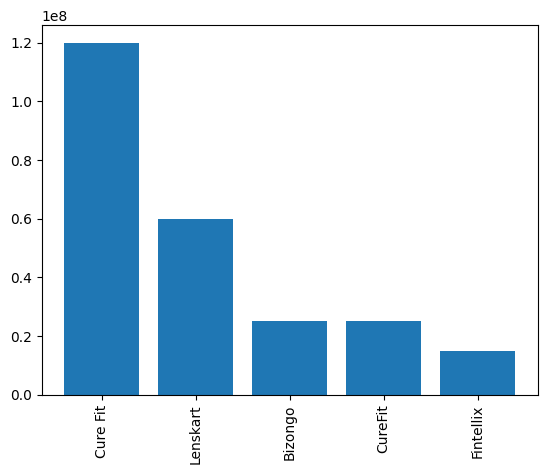

In [47]:
plt.bar(test['starup'], test['amount'])
plt.xticks(rotation='vertical')
plt.show()

AttributeError: 'Figure' object has no attribute 'xticks'

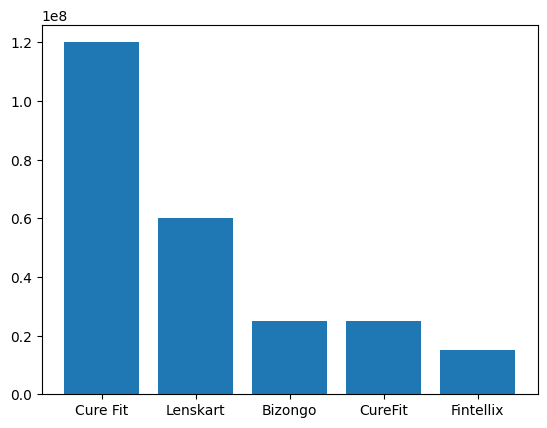

In [ ]:
fig, ax = plt.subplots() 
ax.bar(test['starup'], test['amount'])
fig.xticks('verticle')